In [2]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [4]:
medical = pd.read_csv('insurance2.csv')
medical.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [12]:
#1 Use bootstrapping to estimate the 95% confidence interval lower limit
np.random.seed(47)
def bs_reps(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bs_reps(medical['charges'], np.mean)
conf_int95 = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int95[0])
print('Same as previous inferential statistics result.')

12624.862119128531
Same as previous inferential statistics result.


Null Hypothesis: The standard deviation of those with and without insurance is the same.
95% Confidence [6685.21459399 8480.26550359]
Observed difference in standard deviation 7596.256408655178
I accept the null hypothesis as our observed difference in standard deviations is within our calculated 95% confidence interval.


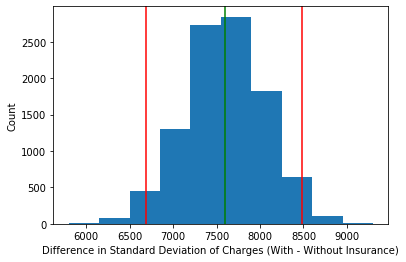

In [26]:
#2 Calculate 95% confidence interval for difference between standard deviations of those with and without insurance. 
# Plot the histogram of values and mark locations of percentiles
print('Null Hypothesis: The standard deviation of those with and without insurance is the same.')
ins = medical['charges'].loc[medical['insuranceclaim'] == 1]
no_ins = medical['charges'].loc[medical['insuranceclaim'] == 0]
diff_stds = np.std(ins) - np.std(no_ins)
diff_reps = np.empty(10000)
for i in range(10000):
    diff_reps[i] = bs_reps(ins, np.std) - bs_reps(no_ins, np.std)
interval95 = np.percentile(diff_reps, [2.5, 97.5])
print('95% Confidence',interval95)
print('Observed difference in standard deviation', diff_stds)
print('I accept the null hypothesis as our observed difference in standard deviations is within our calculated 95% confidence interval.')
plt.hist(diff_reps)
plt.xlabel('Difference in Standard Deviation of Charges (With - Without Insurance)')
plt.ylabel('Count')
plt.axvline(interval95[0], color='red')
plt.axvline(interval95[1], color='red')
plt.axvline(diff_stds, color='green')
plt.show()

In [35]:
#3 Calculate p value for the observed difference in mean charges for those with/without insurance
print('Null Hypothesis: Those with and without insurance are charged the same on average.')
diff_means = np.mean(ins) - np.mean(no_ins)
mean_charge = np.mean(np.concatenate((ins, no_ins)))
ins_shifted = ins - np.mean(ins) + mean_charge
no_ins_shifted = no_ins - np.mean(no_ins) + mean_charge
diff_reps = np.empty(10000)
for i in range(10000):
    diff_reps[i] = bs_reps(ins_shifted, np.mean) - bs_reps(no_ins_shifted, np.mean)
p = np.sum(diff_reps >= diff_means)/len(diff_reps)   
print('p-value', p)
print('Reject the null hypothesis')

Null Hypothesis: Those with and without insurance are charged the same on average.
p-value 0.0
Reject the null hypothesis


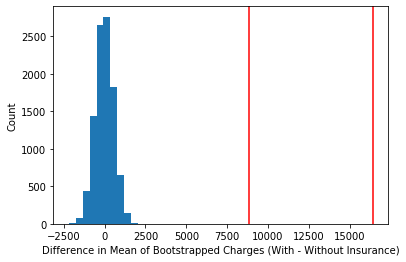

Plotted the observed means for both those with and without insurance. The highest mean difference from the bootstrapped differences is way less than the observed difference in our actual data.


In [39]:
#4 Plot Histogram of bootstrapped differences along with lines marking the locations of the observed difference
plt.hist(diff_reps)
plt.xlabel('Difference in Mean of Bootstrapped Charges (With - Without Insurance)')
plt.ylabel('Count')
plt.axvline(np.mean(ins), color='red')
plt.axvline(np.mean(no_ins), color='red')
plt.show()
print('Plotted the observed means for both those with and without insurance. The highest mean difference from the bootstrapped differences is way less than the observed difference in our actual data.')

In [40]:
#5 Would you want to perform enough bootstrapped replicates to observe a random difference as large as the one we observed?
print('With the very small p-value we got doing a t-test, there is a chance that if we do a whole bunch of replicates that we would eventually get a difference at least as large. In my opinion, it would not be an efficient use of time at all.')

With the very small p-value we got doing a t-test, there is a chance that if we do a whole bunch of replicates that we would eventually get a difference at least as large. In my opinion, it would not be an efficient use of time at all.


In [41]:
#6 Of the two variants of the t-test we performed in the previous assignment, which one would you use now?
print('I would stick with the t-test in which we assumed the variance was the same.')

I would stick with the t-test in which we assumed the variance was the same.


In [45]:
#7 If you were looking at the clickthrough results for a current algorithm and a new one, would you perform a two-sided test as above? 
print('It would be a two sided test.')
print('Null Hypothesis: The clickthrough rate is did not change with the new algorithm')
print('Alternative Hypothesis: The clickthrough rate was impacted by the change in algorithm')
print('If we reject the null hypothesis, then we can choose to implement the new algorithm inplace of the current due to the positive change in clickthrough rate not just being by chance on a single trial.')

It would be a two sided test.
Null Hypothesis: The clickthrough rate is did not change with the new algorithm
Alternative Hypothesis: The clickthrough rate was impacted by the change in algorithm
If we reject the null hypothesis, then we can choose to implement the new algorithm inplace of the current due to the positive change in clickthrough rate not just being by chance on a single trial.
